# 2020 English Premier League Statistics EDA

### Author: Jeremy Rummel

### Purpose:  The analysis of various statistics from the 2020 English Premier League season.

## 1. Imports

In [81]:
import pandas as pd
import seaborn as sns
import matplotlib 

# Axes object (basic plot type returned by Seaborn)
from matplotlib.axes import Axes

## 2. Load Data

In [82]:
# Load the Iris dataset into pandas DataFrame
soccer_df: pd.DataFrame = pd.read_csv('soccer_stats.csv')

# List column names
soccer_df.columns

# Inspect first few rows of the DataFrame
soccer_df.head()

,Name,Position,Age,Appearances,Wins,Losses,Goals,Assists,Passes,Passes per match,Yellow cards,Red cards,Fouls,Offsides
0,Bernd Leno,Goalkeeper,28.0,64,28,16,0,0,1783,27.86,2,0,0,NaN
1,Matt Macey,Goalkeeper,26.0,0,0,0,0,0,0,0.00,0,0,0,NaN
2,Rúnar Alex Rúnarsson,Goalkeeper,25.0,0,0,0,0,0,0,0.00,0,0,0,NaN
3,Héctor Bellerín,Defender,25.0,160,90,37,7,18,7125,44.53,23,0,125,8.0
4,Kieran Tierney,Defender,23.0,16,7,5,1,1,519,32.44,2,0,9,0.0


## 3.  Initial Data Inspection

In [83]:
# Specify the number of rows to display
soccer_df.head(10)

# Inspect the shape of the DataFrame with shape attribute
# The shape is a tuple with count of rows and columns in the DataFrame
soccer_df.shape

# Inspect the data types of the columns with dtypes attribute
# The data types are returned as a pandas Series
soccer_df.dtypes

# Inspect the data types of the columns with info() method
soccer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              571 non-null    object 
 1   Position          571 non-null    object 
 2   Age               570 non-null    float64
 3   Appearances       571 non-null    int64  
 4   Wins              571 non-null    int64  
 5   Losses            571 non-null    int64  
 6   Goals             571 non-null    int64  
 7   Assists           571 non-null    int64  
 8   Passes            571 non-null    int64  
 9   Passes per match  571 non-null    float64
 10  Yellow cards      571 non-null    int64  
 11  Red cards         571 non-null    int64  
 12  Fouls             571 non-null    int64  
 13  Offsides          502 non-null    float64
dtypes: float64(3), int64(9), object(2)
memory usage: 62.6+ KB


## 4.  Initial Descriptive Statistics

In [84]:
# Inspect summary statistics for numerical columns
soccer_df.describe()

,Age,Appearances,Wins,Losses,Goals,Assists,Passes,Passes per match,Yellow cards,Red cards,Fouls,Offsides
count,570.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,502.000000
mean,25.789474,68.823117,28.957968,23.896673,7.327496,5.285464,2309.704028,25.895989,7.917688,0.301226,53.033275,11.063745
std,4.377354,81.797516,38.969376,28.488376,16.810490,9.761765,3127.226566,18.566906,11.556811,0.698607,75.605560,26.570058
min,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,3.000000,1.000000,1.000000,0.000000,0.000000,92.000000,11.255000,0.000000,0.000000,1.000000,0.000000
50%,26.000000,36.000000,12.000000,14.000000,1.000000,1.000000,1000.000000,25.010000,3.000000,0.000000,22.000000,2.000000
75%,29.000000,108.000000,41.000000,36.000000,6.000000,6.000000,3285.000000,37.970000,11.000000,0.000000,74.000000,8.750000
max,38.000000,539.000000,272.000000,158.000000,180.000000,84.000000,17932.000000,98.500000,81.000000,5.000000,438.000000,203.000000


## 5. Initial Data Distribution for Numerical and Categorical Columns

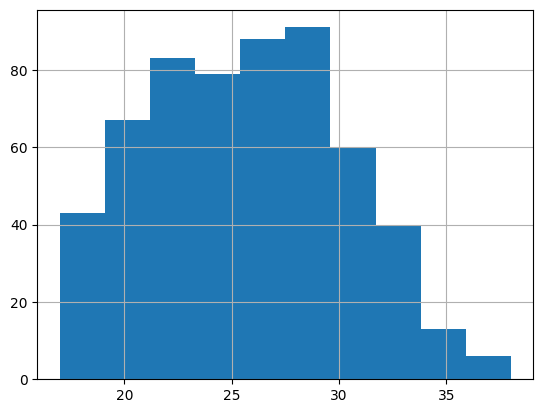

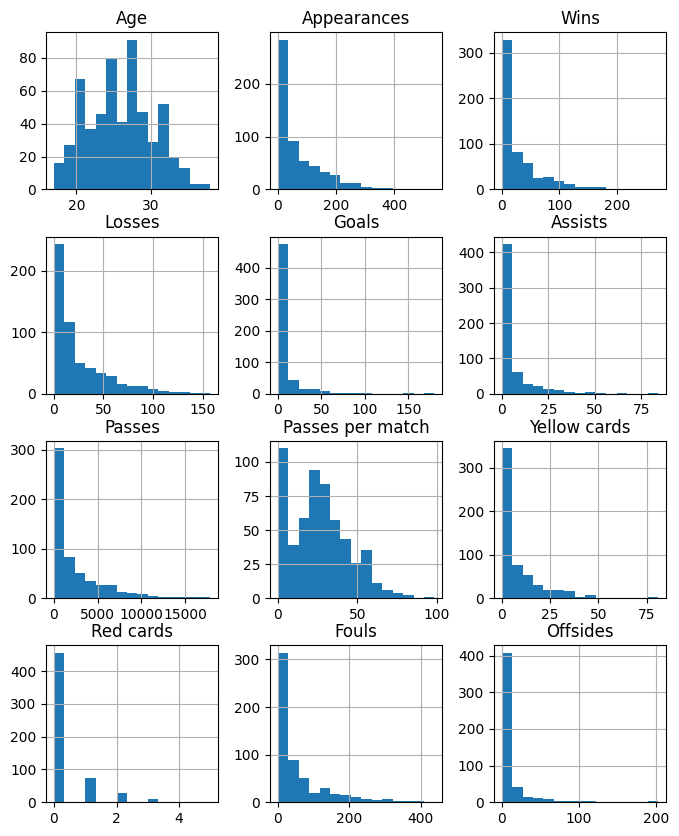

In [85]:
# Inspect histogram by one numerical column
soccer_df['Age'].hist()

# Inspect histograms for ALL numerical columns
soccer_df.hist(bins=15, figsize=(8,10))

# Show all plots
matplotlib.pyplot.show()

The majority of players are aged in their early 20's to early 30's.

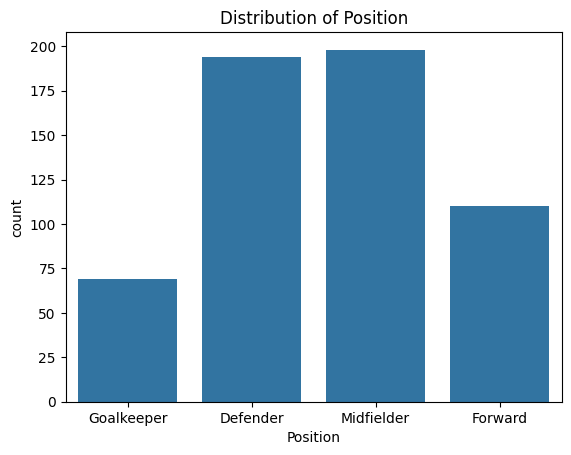

In [86]:
# Inspect value counts by categorical column
# Column name must be EXACT.
# The value_counts() method is only available for Series objects.
# The value_counts() method returns a pandas Series with the counts of unique values in the column.
soccer_df['Position'].value_counts()

# Inspect value counts for categorical columns, dropping "Name"
soccer_excluded = soccer_df.drop("Name", axis=1)
for col in soccer_excluded.select_dtypes(include=['object', 'category']).columns:
    # Display count plot
    sns.countplot(x=col, data=soccer_excluded)
    matplotlib.pyplot.title(f'Distribution of {col}')
    matplotlib.pyplot.show()

# Show all plots
matplotlib.pyplot.show()

The data shows a similar number of defenders and midfielders followed by forwards and goalkeepers.

## 6. Initial Data Transformation and Feature Engineering

In [87]:
# Feature Engineering
# Renaming a column
soccer_df.rename(columns={'Appearances': 'Matches'}, inplace=True)

# Adding a new column
soccer_df['Goals per game'] = soccer_df['Goals'] / soccer_df['Matches']

## 7. Initial Visualizations

### Chart 1 <br>
Goal:  Determine the position that commits the most fouls. <br>
Chart:  A barplot will be used to visualize the data.

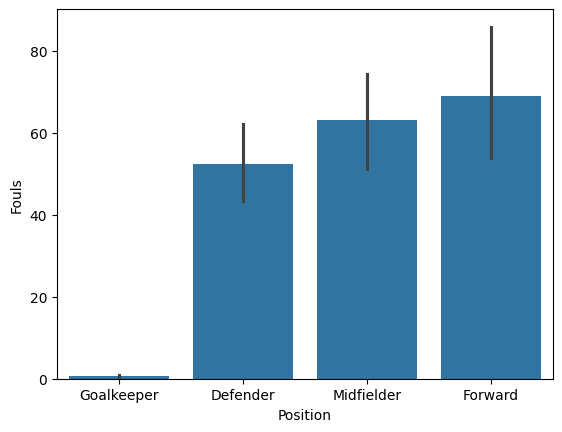

In [88]:
# Create a barplot 
sns.barplot(soccer_df, x="Position", y="Fouls")

# Show all plots
matplotlib.pyplot.show()

The above chart demonstrates that the forward position commits the most fouls, followed by midfielders, defenders and goalkeepers.

### Chart 2
Goal: Determine the position that scores the most goals per match. <br>
Chart:  A scatterplot will be used to visualize the data.

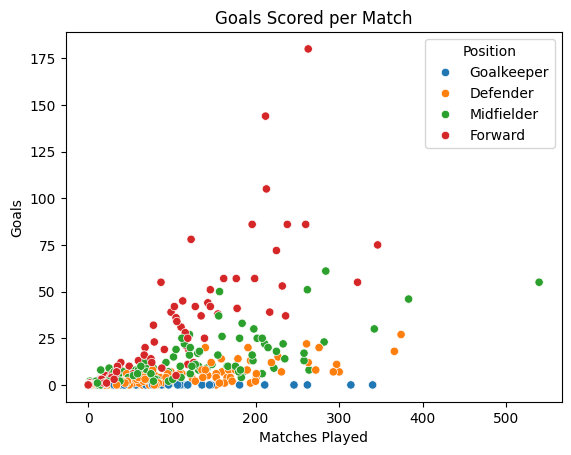

In [89]:
# A scatter plot is a plot of two numerical variables.
scatter_plt: Axes = sns.scatterplot(
    data=soccer_df, x="Matches", y="Goals", hue="Position"
)

# Set axis labels using the Matplotlib Axes methods set_xlabel() and set_ylabel()
scatter_plt.set_xlabel("Matches Played")
scatter_plt.set_ylabel("Goals")   

# Set the title using the Matplotlib Axes set_title() method
scatter_plt.set_title("Goals Scored per Match")

matplotlib.pyplot.show()

The data demonstrates that overall forwards score the most goals followed by midfielders.

### Chart 3 <br>
Goal: Determine the position with the most passes per game. <br>
Chart:  A multiple liner regression will be utlilized to visualize the data

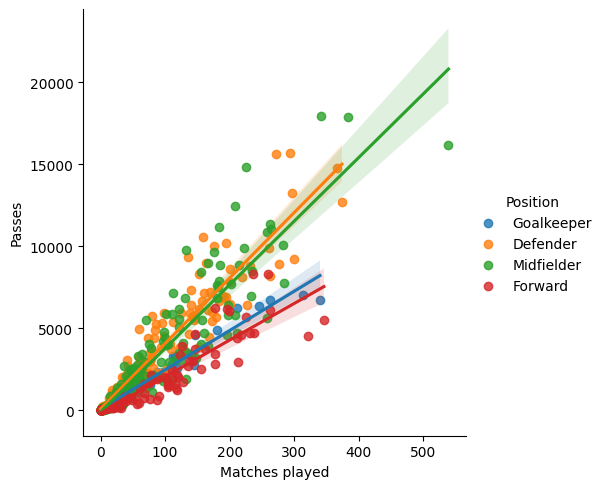

In [90]:
plot =sns.lmplot(
    data=soccer_df,
    x="Matches", y="Passes", hue="Position",
    height=5
)

# Use more informative axis labels than are provided by default
plot.set_axis_labels("Matches played", "Passes")

matplotlib.pyplot.show()

The data demonstrates that midfielders and defenders pass a similar number of times per match played.